# Part1 
For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:
![avatar](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/7JXaz3NNEeiMwApe4i-fLg_40e690ae0e927abda2d4bde7d94ed133_Screen-Shot-2018-06-18-at-7.17.57-PM.png?expiry=1577750400000&hmac=dAr24hc67pgcGmyZ-fZoX5S64P8NUZoWKLUNBIIcINY)


3. To create the above dataframe:

    * The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    * Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    * More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
    * If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
    * Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    * In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)

**Note**: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

In [77]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

## Step1. Get data
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

In [9]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')

In [10]:
# identify table row pattern from source page
# luckily have only one table in page
table_can_zipinfo = soup.find('table')
tb_rows = table_can_zipinfo.find_all('tr')
# extract 
tb = []
for row in tb_rows:
    # extract content
    tb_row = row.find_all('td')
    if len(tb_row)<3:# identify head
        tb_head = [x.text.strip() for x in row.find_all('th')]
        continue
    else:# use text.strip() to extract text
        elements = [x.text.strip() for x in tb_row]
        tb.append(elements)

df = pd.DataFrame(tb,columns = tb_head)
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


## Step2: Clean data
1. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
2. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
3. If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
4. Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
5. In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

1. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [11]:
df_na = df[df['Neighborhood']=='Not assigned']
# 1 not assigned del
df_drop = df.drop(index=df_na.index)
df_drop.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


2. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [12]:
# 2 combine duplicate
df_combined = df_drop.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_combined.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


3. If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [13]:
# 3 Not assigned = self
df_na.loc[:,'Neighborhood']=df_na['Borough'].values
# drop both not assigned
df_na.drop(df_na[df_na['Borough']=='Not assigned'].index, inplace=True)
df_na.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Postcode,Borough,Neighborhood
7,M7A,Queen's Park,Queen's Park


## Part 1 output
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [14]:
Wiki_data = pd.concat([df_na, df_combined],axis=0)
print('have total rows of {}'.format(Wiki_data.shape[0]))
Wiki_data.head(10)

have total rows of 103


,Postcode,Borough,Neighborhood
7,M7A,Queen's Park,Queen's Park
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"


# Part 2
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:
![avatar](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/HZ3jNHNOEeiMwApe4i-fLg_f44f0f10ccfaf42fcbdba9813364e173_Screen-Shot-2018-06-18-at-7.18.16-PM.png?expiry=1577750400000&hmac=vfypMCE2fGHZpGcL1mTp_OYF1ZmPhJ-NOw6O1TwI04g)


In [15]:
url = 'https://cocl.us/Geospatial_data'
Google_data = pd.read_csv(url)
Google_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Merge Google data and above Wiki data

In [16]:
Geo_data = pd.merge(Google_data, Wiki_data, how = 'inner', left_on = ['Postal Code'], right_on = ['Postcode'])
Geo_data = Geo_data[['Postcode','Borough','Neighborhood','Latitude','Longitude']]
Geo_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [73]:
Geo_data.Borough.unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

# Part 3: Exploration
Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

1. to add enough Markdown cells to explain what you decided to do and to report any observations you make.
2. to generate maps to visualize your neighborhoods and how they cluster together.

In [17]:
from geopy.geocoders import Nominatim
import folium # map rendering library

## Visualization Map
can not preview on github, should download to preview.

In [18]:
address = 'Toronto, Canada'

# get coordinate of target
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Geo_data['Latitude'], Geo_data['Longitude'], Geo_data['Borough'], Geo_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


## Load data from Foursquare


In [29]:
CLIENT_ID = 'GWPHVXE0UET52Y0CFGXOZIC2FIVBGF20ZDGIB3PSMR0X1AFD' # your Foursquare ID
CLIENT_SECRET = 'TAFXR2ICOAS1R2NG4J5WCTPGCCVVMDTAWSHYER11JZI13F13' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100
def getNearbyVenues(name, lat, lng, radius=500):
    '''
    find around venues for given lat and lng
    refer to https://github.com/veena2019/Coursera_Capstone/blob/master/TorontoPart3.ipynb
    '''
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    # return only relevant information for each nearby venue
    return [
                {
                'Neighborhood':name, 
                'Neighborhood Latitude':lat, 
                'Neighborhood Longitude':lng, 
                'Venue':v['venue']['name'], 
                'Venue Latitude':v['venue']['location']['lat'], 
                'Venue Longitude':v['venue']['location']['lng'],  
                'Venue Category':v['venue']['categories'][0]['name']
                }
                for v in results]

In [36]:
# loading bar display
from tqdm import tqdm_notebook

In [38]:
city_venues = []

for rows in tqdm_notebook(Geo_data.values):
    #print(rows)
    neighbour_venue_l = getNearbyVenues(rows[2],
                                   rows[3],
                                   rows[4]
                                  )
    city_venues.extend(neighbour_venue_l)

venue_df = pd.DataFrame(city_venues)
venue_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,Fast Food Restaurant,43.807448,-79.199056
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,Bar,43.782533,-79.163085
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,History Museum,43.788755,-79.162438
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,Pizza Place,43.767697,-79.189914
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,Electronics Store,43.765309,-79.191537


### Venue Check

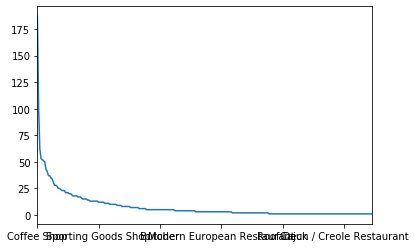

,index,Venue Category
0,Coffee Shop,187
1,Café,100
2,Restaurant,62
3,Park,53
4,Pizza Place,52
5,Bakery,51
6,Italian Restaurant,50
7,Sandwich Place,43
8,Bar,41
9,Hotel,37


In [84]:
venue_df['Venue Category'].value_counts().plot()
plt.show()
venue_df['Venue Category'].value_counts().reset_index()

Drop features with few value, set a threshold so that venues with limited impact on neighborhoods will be eliminated.

In [90]:
venue_threshold = 5
temp = venue_df['Venue Category'].value_counts().reset_index()
venue_feature = temp[temp['Venue Category']<venue_threshold]['index'].to_list()
print('kept total of {} out of {} features'.format(len(venue_feature),len(temp)))
venue_feature

kept total of 162 out of 274 features


['Food Truck',
 'Fountain',
 'Miscellaneous Shop',
 'Shoe Store',
 'Gluten-free Restaurant',
 'Bus Station',
 'Poke Place',
 'Pool',
 'General Travel',
 'Lingerie Store',
 'Wings Joint',
 'Baseball Field',
 'Dumpling Restaurant',
 'Neighborhood',
 'History Museum',
 'Monument / Landmark',
 'Basketball Stadium',
 'Train Station',
 'Cupcake Shop',
 'Rental Car Location',
 'Portuguese Restaurant',
 'Brazilian Restaurant',
 'Bistro',
 'Building',
 'Performing Arts Venue',
 'Irish Pub',
 'Record Shop',
 'Scenic Lookout',
 'Sculpture Garden',
 'Korean Restaurant',
 'Health Food Store',
 'Office',
 'Falafel Restaurant',
 'Donut Shop',
 'General Entertainment',
 'Fish & Chips Shop',
 'Gas Station',
 'Video Game Store',
 'Modern European Restaurant',
 'Toy / Game Store',
 'Market',
 'Lake',
 'Comic Shop',
 'Dog Run',
 'Smoke Shop',
 "Women's Store",
 'Airport Service',
 'Food',
 'Poutine Place',
 'Tanning Salon',
 'Supplement Shop',
 'Accessories Store',
 'Candy Store',
 'Video Store',
 'Church

## Analyze neighborhood
1. Data processing: dummy value.
2. Generate feature: total venue as feature.
3. 

### 1 Dummy value
One hot encoding for **Venue Category**.

Excluded features according to our features thershold.

Changed name of *Neighborhood* to *Neighbourhood* for resolving duplicate column value.

In [91]:
# one hot encoding
onehot = pd.get_dummies(venue_df[['Venue Category']], prefix="", prefix_sep="")[venue_feature]

# add neighborhood column back to dataframe
nb = venue_df[['Neighborhood']].rename(columns={'Neighborhood':'Neighbourhood'})
toronto_onehot = pd.concat([nb,onehot],axis=1).reset_index(drop=True)

toronto_onehot.head()

,Neighbourhood,Food Truck,Fountain,Miscellaneous Shop,Shoe Store,Gluten-free Restaurant,Bus Station,Poke Place,Pool,General Travel,...,German Restaurant,Strip Club,Molecular Gastronomy Restaurant,Home Service,Airport Food Court,Historic Site,Beach,Cafeteria,Motel,Frozen Yogurt Shop
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2 Catogarical feature
In comparing neighbourhoods, the **total number** of venues is important, thus use **sum** to generate feature.

In [137]:
toronto_grouped = toronto_onehot.groupby(['Neighbourhood']).sum().reset_index()
toronto_grouped

,Neighbourhood,Food Truck,Fountain,Miscellaneous Shop,Shoe Store,Gluten-free Restaurant,Bus Station,Poke Place,Pool,General Travel,...,Strip Club,Molecular Gastronomy Restaurant,Home Service,Airport Food Court,Historic Site,Beach,Cafeteria,Motel,Frozen Yogurt Shop,Cluster
0,"Adelaide, King, Richmond",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,42
1,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Bathurst Manor, Downsview North, Wilson Heights",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"Bedford Park, Lawrence Manor East",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Berczy Park,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,30
9,"Birch Cliff, Cliffside West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3 Clustering


In [94]:
from sklearn.cluster import KMeans 

In [138]:
# set number of clusters
kclusters = 20

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, n_init=100).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
toronto_grouped['Cluster'] = kmeans.labels_
cluster_df = toronto_grouped[['Neighbourhood','Cluster']]
cluster_df.head()

,Neighbourhood,Cluster
0,"Rouge, Malvern",0
1,"Highland Creek, Rouge Hill, Port Union",0
2,"Highland Creek, Rouge Hill, Port Union",6
3,"Guildwood, Morningside, West Hill",0
4,"Guildwood, Morningside, West Hill",0


In [139]:
merge_df = pd.merge(cluster_df, Geo_data, how = 'inner',left_on = 'Neighbourhood',right_on = 'Neighborhood').drop('Neighbourhood',axis=1)
merge_df.head()

,Cluster,Postcode,Borough,Neighborhood,Latitude,Longitude
0,0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,0,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,6,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
3,0,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
4,0,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711


In [111]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [140]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merge_df['Latitude'], merge_df['Longitude'], merge_df['Neighborhood'], merge_df['Cluster']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
''' '''
map_clusters